# Comparison of lengthscales
## All Stabilities

In [1]:
%%capture
# Important header information
#naluhelperdir = './'
# Important header information
naluhelperdir = '../utilities/'

import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import correlate as corr
from matplotlib.lines import Line2D
%matplotlib inline

# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

In [2]:
# Locations of all of the runs
baserundir = '../../'
NumReqCols = 3   # Number of required columns in the table

# Define all cases here
runlist = [
    # Case        dir       file    
    ['stable05',   'AMRWindRuns/stable/05ms/sim_dx2.5/',  'stable05_avgRij_0_2500_501_iplane_0.dat',            {'WS':5,  'color':'b', 'lw':0.5, 'lstyle':'--'}],
    ['stable10',   'AMRWindRuns/stable/10ms/sim_dx2.5/',  'stable10_avgRij_0_2500_501_iplane_0.dat',            {'WS':10, 'color':'b', 'lw':1, 'lstyle':'-.'}],
    ['stable15',   'AMRWindRuns/stable/15ms/sim_dx2.5/',  'stable15_avgRij_0_2500_501_iplane_0.dat',            {'WS':15, 'color':'b', 'lw':1.25, 'lstyle':'-'}],
    
    # Neutral cases
    ['neutral05',  'NaluWindRuns/neutral/05ms/05ms_iter07', 'neutral05_avgRij_30001_39991_1000_iplane_0.dat',   {'WS':5, 'color':'g', 'lstyle':'--', 'lw':0.5}],
    ['neutral10',  'NaluWindRuns/neutral/10ms/10ms_iter03', 'neutral10_avgRij_31001_39481_849_iplane_0.dat',    {'WS':10, 'color':'g', 'lstyle':'-.', 'lw':1}],
    ['neutral15',  'NaluWindRuns/neutral/15ms/15ms_iter03', 'neutral15_avgRij_30001_39991_1000_iplane_0.dat',   {'WS':15, 'color':'g', 'lstyle':'-',  'lw':1.25}],
    
    ['unstable05', 'NaluWindRuns/unstable/05ms/05ms_iter01', 'unstable05_avgRij_30001_34991_500_iplane_0.dat',  {'WS':5, 'color':'r', 'lstyle':'--', 'lw':0.5}],
    ['unstable10', 'NaluWindRuns/unstable/10ms/10ms_iter01', 'unstable10_avgRij_30001_39991_1000_iplane_0.dat', {'WS':10, 'color':'r', 'lstyle':'-.', 'lw':1.0}],
    ['unstable15', 'NaluWindRuns/unstable/15ms/15ms_iter01', 'unstable15_avgRij_30001_34991_500_iplane_0.dat',  {'WS':15, 'color':'r', 'lstyle':'-',  'lw':1.25}],
]

# Stuff for saving figures
savefigs = True
figdir   = '../../Paper/figures/'

## Plot the comparisons

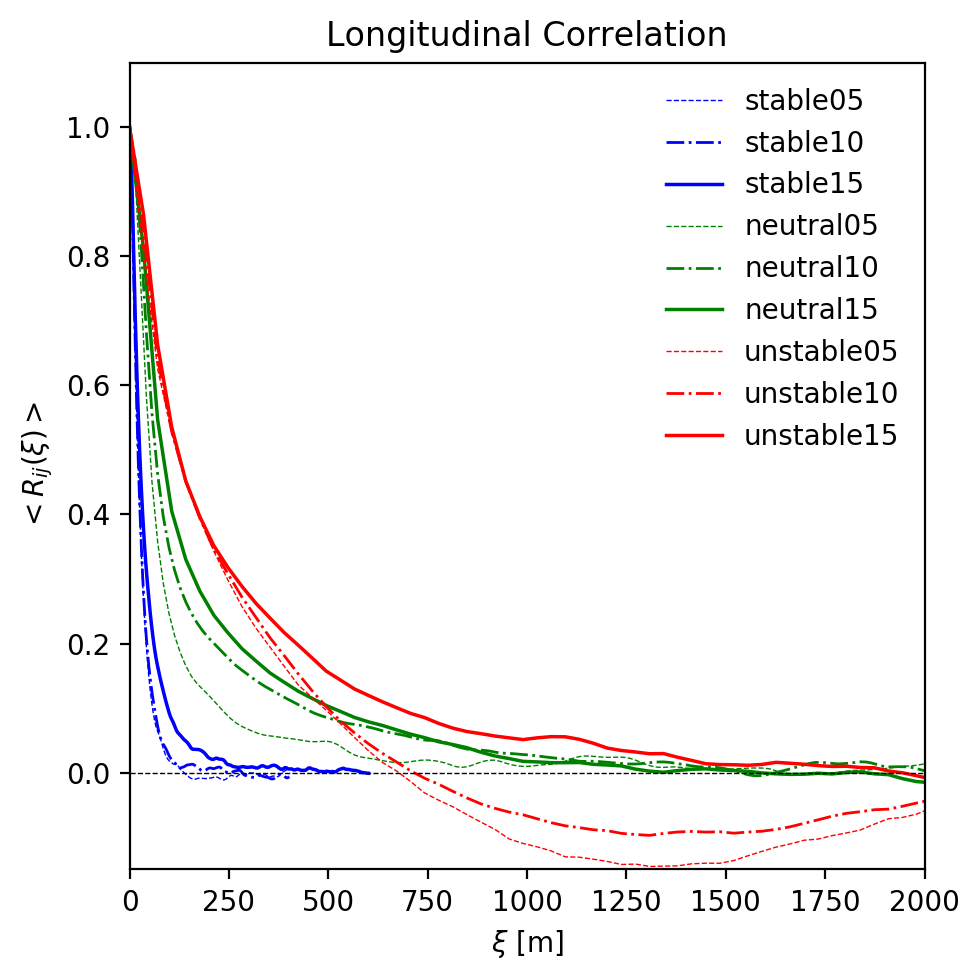

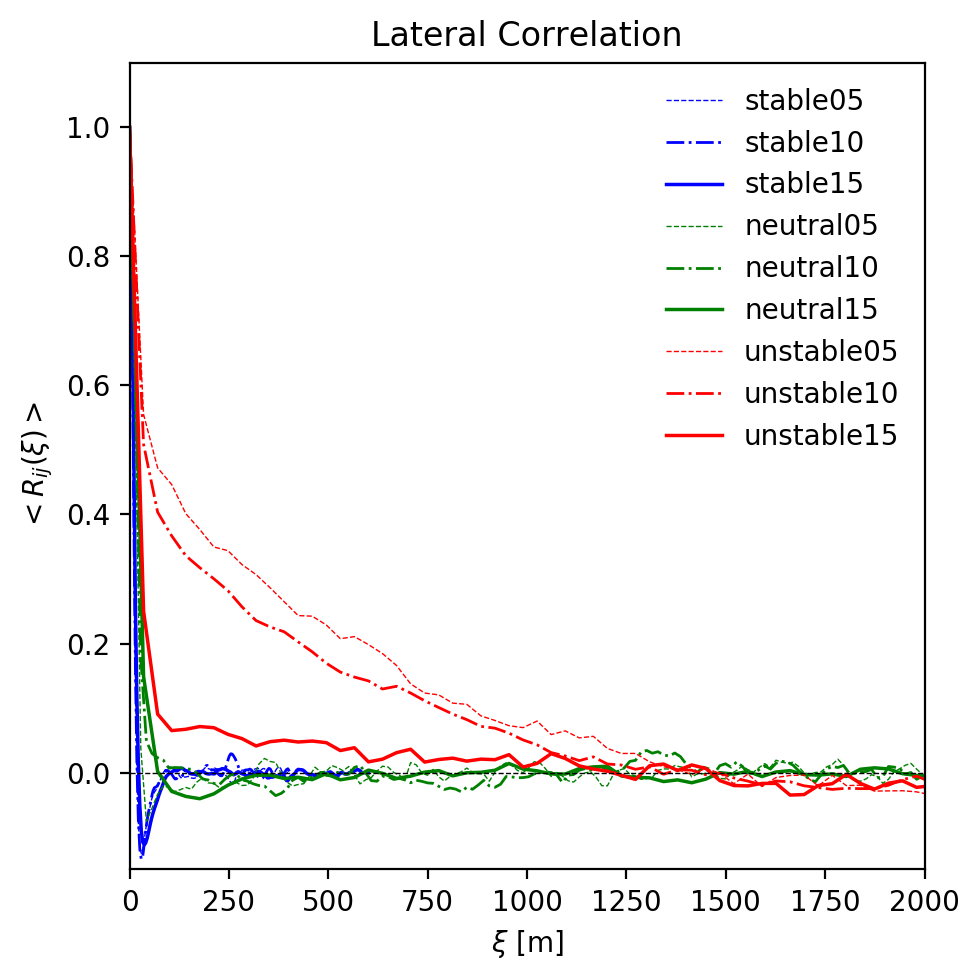

In [3]:
# --- Paper version ---
plt.figure("long", figsize=(5,5),dpi=200)
plt.figure("lat",  figsize=(5,5),dpi=200)
#plt.rc('font', size=14)
for irun, run in enumerate(runlist[:]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    rundir   = run[1]
    datafile = run[2]
    
    RijData  = np.loadtxt(baserundir+'/'+rundir+'/'+datafile)
    plt.figure("long")
    plt.plot(RijData[:,0], RijData[:,1], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    plt.figure("lat")
    plt.plot(RijData[:,2], RijData[:,3], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)

# Construct a legend
plt.figure("long")
plt.legend(loc='upper right',frameon=False)
plt.ylim([-0.15, 1.1]);
plt.xlim([0, 2000])
plt.xlabel(r'$\xi$ [m]')
plt.ylabel(r'$<R_{ij}(\xi)>$')
#plt.grid()
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.title(r'Longitudinal Correlation');
plt.tight_layout()

plt.figure("lat")
plt.legend(loc='upper right',frameon=False)
plt.ylim([-0.15, 1.1]);
plt.xlim([0, 2000])
plt.xlabel(r'$\xi$ [m]')
plt.ylabel(r'$<R_{ij}(\xi)>$')
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
#plt.grid()
plt.title(r'Lateral Correlation');
plt.tight_layout()

if savefigs:
    plt.figure("long")
    plt.savefig(figdir+'/'+'AllStability_Rij_Longitudinal.png')
    plt.figure("lat")
    plt.savefig(figdir+'/'+'AllStability_Rij_Lateral.png')

stable05 27.689340 9.332672
stable10 29.590585 9.552977
stable15 43.831459 10.800954
neutral05 110.435741 15.245327
neutral10 165.398368 20.634052
neutral15 184.081967 22.961169
unstable05 187.868710 270.538753
unstable10 195.376419 217.735197
unstable15 263.475309 67.999898


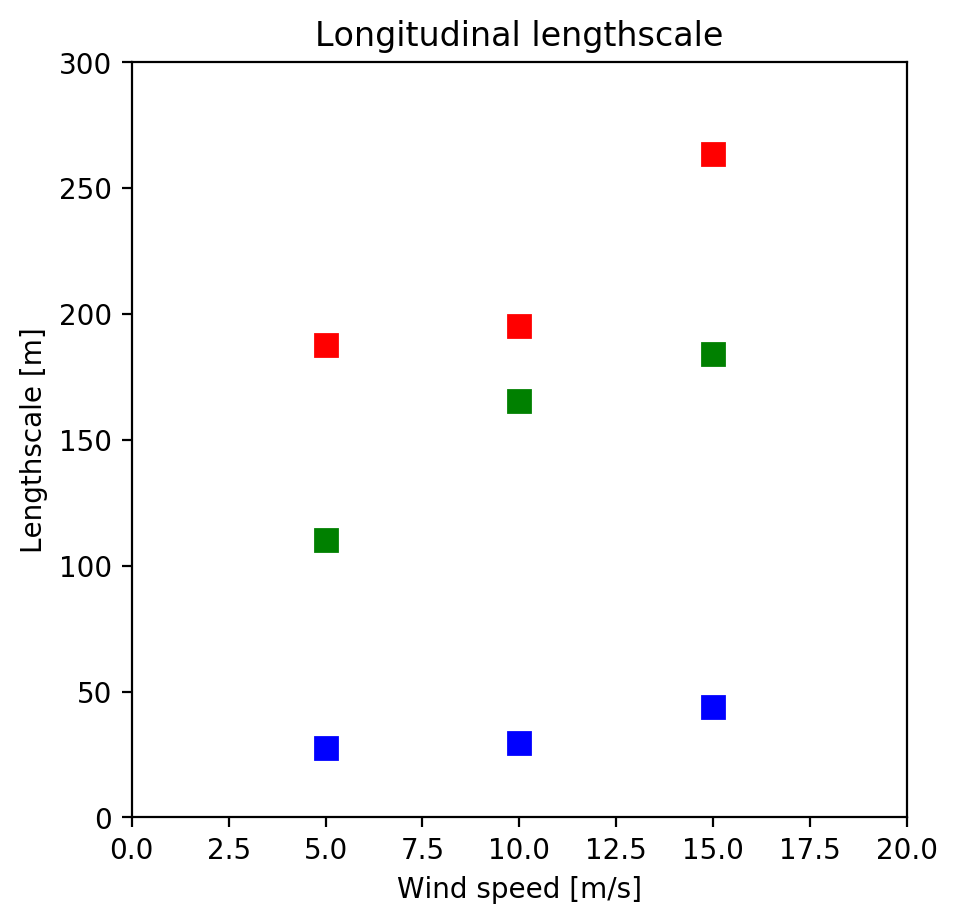

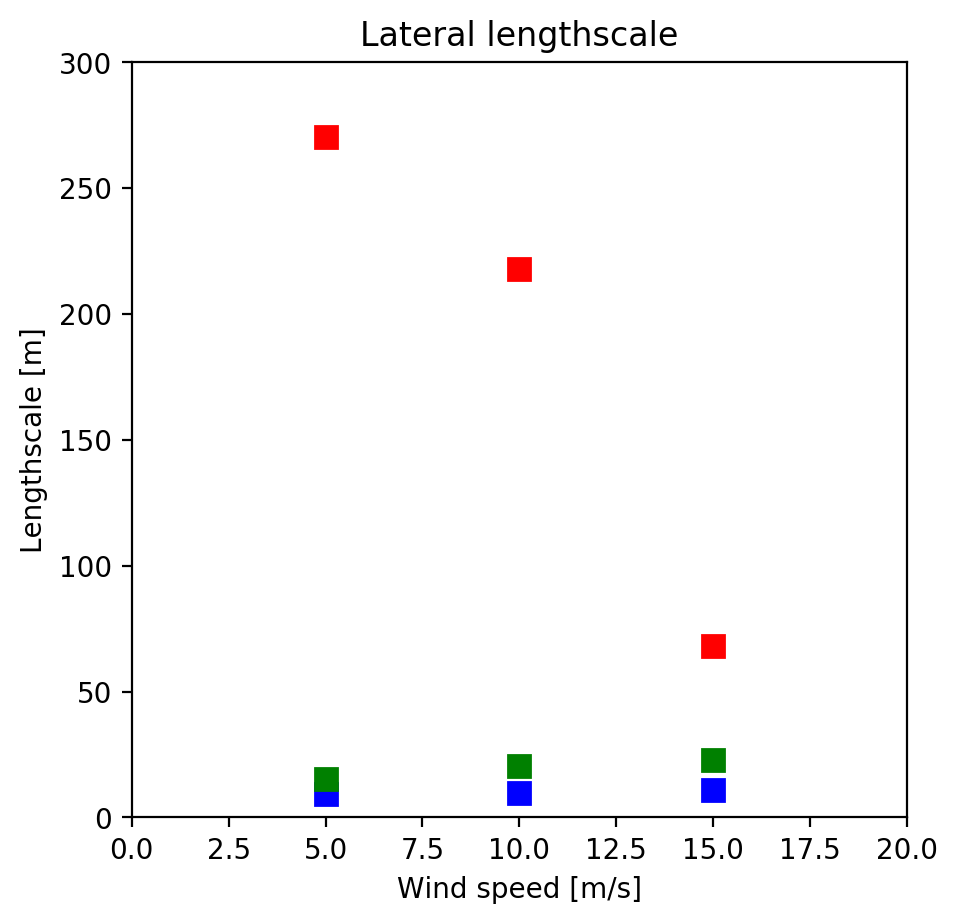

In [4]:
# --- Paper version ---
plt.figure("long", figsize=(5,5),dpi=200)
plt.figure("lat",  figsize=(5,5),dpi=200)
#plt.rc('font', size=14)
for irun, run in enumerate(runlist[:]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    WS       = getparam('WS', rundict, 0) 
    label    = run[0]
    rundir   = run[1]
    datafile = run[2]
    
    RijData  = np.loadtxt(baserundir+'/'+rundir+'/'+datafile)
    # Calculate lengthscale
    longlengthscale = corr.calclengthscale(RijData[:,0], RijData[:,1])
    latlengthscale  = corr.calclengthscale(RijData[:,2], RijData[:,3])
    #print('LONG lengthscale = %f'%longlengthscale)
    print('%s %f %f'%(label, longlengthscale, latlengthscale))
    plt.figure("long")
    plt.plot(WS, longlengthscale, marker='s', color=pltcolor, markersize=8)
    plt.figure("lat")
    plt.plot(WS, latlengthscale, marker='s', color=pltcolor, markersize=8)
    
plt.figure("long")
plt.ylim([0, 300]);
plt.xlim([0, 20])
plt.xlabel('Wind speed [m/s]');
plt.ylabel('Lengthscale [m]');
plt.title('Longitudinal lengthscale');

plt.figure("lat")
plt.ylim([0, 300]);
plt.xlim([0, 20])
plt.xlabel('Wind speed [m/s]');
plt.ylabel('Lengthscale [m]');
plt.title('Lateral lengthscale');

if savefigs:
    plt.figure("long")
    plt.savefig(figdir+'/'+'AllStability_Rij_LongitudinalLengthscale.png')
    plt.figure("lat")
    plt.savefig(figdir+'/'+'AllStability_Rij_LateralLengthscale.png')